In [1]:
# v2.4_UCB
# Bayesian Optimization
# xgboost as gold with early stop
# different regressor:
# xgboost , sklearn MLP, keras ANN, linear regression, random forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Load All Dataset in One DataFrame
dataset = pd.concat([pd.read_csv('no_controls/plate_AL_{}_raw_yield_and_std.csv'.format(i)) for i in range(1,11)], ignore_index=True)
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values

In [11]:
dataset

,nad,folinic_acid,coa,nucleo_mix,spermidin,pga,aa,trna,mg_gluta,camp,K_gluta,yield,yield_std
0,0.165,0.0204,0.078,0.75,0.3,9,0.45,0.02,1.2,0.375,40,0.0000,0.0131
1,0.330,0.0680,0.260,1.50,1.0,30,1.50,0.20,0.4,0.750,80,0.0000,0.0095
2,0.330,0.0680,0.260,0.15,1.0,30,1.50,0.20,4.0,0.750,80,0.0000,0.0770
3,0.330,0.0680,0.260,0.45,1.0,30,1.50,0.20,4.0,0.750,80,0.0000,0.0940
4,0.330,0.0680,0.260,1.50,1.0,30,0.15,0.20,4.0,0.750,80,0.0147,0.0233
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,0.330,0.0680,0.026,1.50,0.1,9,1.50,0.10,4.0,0.225,80,2.3193,0.1248
1013,0.330,0.0204,0.026,1.50,0.1,9,1.50,0.20,4.0,0.375,80,2.1215,0.2133
1014,0.330,0.0204,0.260,1.50,0.1,9,1.50,0.06,4.0,0.225,80,1.9952,0.1664
1015,0.330,0.0204,0.078,1.50,0.1,9,1.50,0.20,4.0,0.375,80,2.1736,0.0562


In [13]:
# define our visualiser
def boxplot(data, group_name, quantity, title = '', point_size = 10):
    plt.style.use('seaborn-whitegrid')
    plt.style.use('seaborn-poster')
    fig, ax = plt.subplots(1, 1)
    ax.grid(zorder=0)
    # Usual boxplot
    ax = sns.boxplot(x=group_name, y=quantity, data=data)
    # Add jitter with the swarmplot function.
    ax = sns.swarmplot(x=group_name, y=quantity, data=data, color='k', size=point_size)
    ax.set_title(title)
    return ax

In [14]:
# Define our GOLD STANDARD MODEL
gold_regressor = xgb.XGBRegressor(
objective = 'reg:squarederror',
n_estimators = 500,
learning_rate = 0.01,
max_depth = 6,
min_child_weight = 1,
subsample = 0.8
)
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# Training ...
gold_regressor.fit(X_train, y_train,eval_set=[(X_val, y_val)],eval_metric='mae', early_stopping_rounds=15, verbose=0)

# Predicting the Test set results
y_pred = gold_regressor.predict(X_test)

# Prediction Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)
print('mse :',mse)
print('mae :',mae)
print('R2 :', r2)

mse : 0.01886890725985115
mae : 0.09847669772051422
R2 : 0.9636811529582763


In [15]:
## reconstruct the Paper plot
# Part 1: Reshape Dataset
# Load All Dataset in One DataFrame
box_data = []
for i in range(10):
    temp = pd.read_csv('no_controls/plate_AL_{}_raw_yield_and_std.csv'.format(i+1))
    temp['Step'] = 'Step_{}'.format(i+1)
    box_data.append(temp)
box_dataset = pd.concat(box_data, ignore_index=True)

In [23]:
box_dataset[box_dataset["Step"] == "Step_1"]

,nad,folinic_acid,coa,nucleo_mix,spermidin,pga,aa,trna,mg_gluta,camp,K_gluta,yield,yield_std,Step
0,0.165,0.0204,0.078,0.75,0.3,9,0.45,0.02,1.2,0.375,40,0.0000,0.0131,Step_1
1,0.330,0.0680,0.260,1.50,1.0,30,1.50,0.20,0.4,0.750,80,0.0000,0.0095,Step_1
2,0.330,0.0680,0.260,0.15,1.0,30,1.50,0.20,4.0,0.750,80,0.0000,0.0770,Step_1
3,0.330,0.0680,0.260,0.45,1.0,30,1.50,0.20,4.0,0.750,80,0.0000,0.0940,Step_1
4,0.330,0.0680,0.260,1.50,1.0,30,0.15,0.20,4.0,0.750,80,0.0147,0.0233,Step_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.033,0.0204,0.026,0.45,0.5,15,0.75,0.10,1.2,0.225,40,0.8109,0.0415,Step_1
95,0.033,0.0068,0.026,0.75,0.3,15,0.75,0.02,2.0,0.375,24,0.8326,0.0585,Step_1
96,0.165,0.0204,0.078,0.75,0.5,9,0.15,0.02,0.4,0.375,40,0.8742,0.2105,Step_1
97,0.099,0.0340,0.026,0.75,0.3,15,0.75,0.02,1.2,0.375,40,1.0000,0.0210,Step_1


/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ch

<AxesSubplot:xlabel='Step', ylabel='yield'>

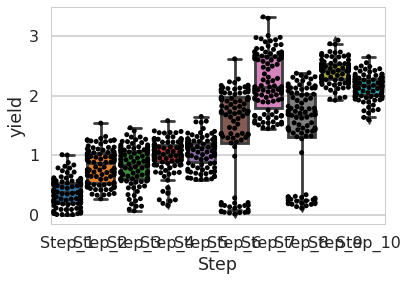

In [16]:
# Part 2: Plotting
boxplot(box_dataset, 'Step', 'yield', point_size=5)

In [17]:
# Part3: Compare to Real One
from IPython.display import Image
Image("Paper_Plot.png")

FileNotFoundError: No such file or directory: 'Paper_Plot.png'

FileNotFoundError: No such file or directory: 'Paper_Plot.png'

<IPython.core.display.Image object>

## Active Learning

In [31]:
# Part 1: choose grid for our metabolite conc

# Allowed concentrations
allowed_conc ={
'nad': (0.033, 0.33),
'folinic_acid': (0.0068, 0.068),
'coa_conc': (0.026, 0.26),
'nucleo_mix': (0.15, 1.5),
'spermidine': (0.1, 1.0),
'pga': (3.0, 30.0),
'aa': (0.15, 1.5),
'trna': (0.02, 0.2),
'mg_gluta': (0.4, 4.0),
'camp': (0.075, 0.75),
'K_gluta': (8.0, 80.0)}

In [32]:
# Part 2: make a random input for our model
def random_input(allowed_conc, n=100, rounded=3, verbose=0):
    X_train = []
    for data_point in range(n):
        input_data = []
        if (data_point % 10000 == 0) and verbose:
            print(data_point)
        for key, value in allowed_conc.items():
            input_data.append(np.round(np.random.uniform(*value), rounded))
        X_train.append(input_data)

    X_train = np.array(X_train)
    return X_train

In [33]:
rd = random_input(allowed_conc)

In [34]:
len(rd)

100

In [35]:
rd[0]

array([1.9000e-01, 9.0000e-03, 1.2100e-01, 1.2980e+00, 9.6800e-01,
       7.7290e+00, 1.2310e+00, 6.1000e-02, 3.6740e+00, 7.3500e-01,
       1.1155e+01])

In [38]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# keras ann
# Artificial Neural Network

# Initialising the ANN
regressor_ann = Sequential()

# Adding the input layer and the first hidden layer
regressor_ann.add(Dense(units = 100, kernel_initializer = 'normal', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
regressor_ann.add(Dense(units = 100, kernel_initializer = 'normal', activation = 'relu'))

# Adding the second hidden layer
regressor_ann.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
regressor_ann.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'relu'))

# Compiling the ANN
regressor_ann.compile(optimizer = 'nadam', loss = 'mean_absolute_error', metrics = ['mae'])

2022-07-24 01:14:28.158546: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-24 01:14:31.516996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
gold_regressor.predict(random_input(allowed_conc))

array([0.34848347, 0.7576999 , 1.9651623 , 0.40885553, 0.6872201 ,
       0.11730453, 0.14957294, 0.6257367 , 0.35205656, 0.6194146 ,
       0.51182413, 0.33750057, 0.3903483 , 0.54248416, 0.46843666,
       0.827979  , 0.44792292, 0.46194646, 0.72337437, 1.3487043 ,
       0.59686416, 0.2954668 , 0.12772408, 0.53759474, 1.5940504 ,
       0.17365421, 0.3515452 , 0.16750064, 0.5543451 , 0.6597631 ,
       0.10669134, 0.35821053, 0.18097317, 0.1257824 , 1.107513  ,
       1.3091233 , 0.556515  , 0.34595388, 0.29115245, 0.24179918,
       0.65855694, 0.08933248, 0.40943265, 1.7438118 , 0.62397707,
       0.28817743, 0.10330809, 0.6212258 , 0.25512618, 0.15862074,
       2.2100756 , 0.5011305 , 0.44865304, 1.5893803 , 0.2580385 ,
       0.0996243 , 0.38882232, 0.22575875, 0.31958422, 0.4118643 ,
       0.3588537 , 0.3044352 , 0.59213734, 0.47751257, 0.67655283,
       0.16847345, 0.3818209 , 0.48031405, 0.5014933 , 0.2587467 ,
       1.7169571 , 0.2115037 , 1.3963128 , 0.60876715, 0.29159

In [40]:
def active_learning(regressor, gold_regressor, allowed_conc, test_size = 100, steps = 10):
    ## first step
    print('step:   1')    
    # make first dataset
    X_train_1 = random_input(allowed_conc, test_size)
    
    # first fit
    regressor.fit(X_train_1, gold_regressor.predict(X_train_1))
    
    # save results
    result = pd.DataFrame(X_train_1)
    result['gold_yield'] = gold_regressor.predict(X_train_1)
    result['step'] = 'step_1'
    
    ## next steps loop
    for step in range(steps-1):
        print('step: ',step+2)
        # make i th dataset
        X_train_1_1 = random_input(allowed_conc, 100000)
        df_1 = pd.DataFrame(X_train_1_1)
        df_1['pred_yield'] = regressor.predict(X_train_1_1)
        df_1 = df_1.sort_values(['pred_yield'], ascending=False)
        X_train_2 = df_1.iloc[0:test_size,0:11].values
        
        # save and add results
        temp_result = pd.DataFrame(X_train_2)
        temp_result['gold_yield'] = gold_regressor.predict(X_train_2)
        temp_result['step'] = 'step_{}'.format(step+2)
        result = pd.concat([result, temp_result], ignore_index=True)
        
        # update and refit regressor
        regressor.fit(result.iloc[:,0:11].values, result.iloc[:,11].values)

    return result, regressor

In [41]:
def bayesian_optimization(regressors_list,
                          gold_regressor,
                          allowed_conc,
                          exploitation=1, exploration=1, test_size=100, steps=10, verbose=0):
    ## first step
    if verbose:
        print('step:  1')    
    # make first dataset
    X_train_1 = random_input(allowed_conc, test_size)
    
    # first fit
    for regressor in regressors_list:
        regressor.fit(X_train_1, gold_regressor.predict(X_train_1))
    
    # save results
    result = pd.DataFrame(X_train_1)
    result['gold_yield'] = gold_regressor.predict(X_train_1)
    result['pred_yield'] = 0.0 # not available but choose 0.0 to avoid further error
    result['step'] = 'step_1'
    
    ## next steps loop
    for step in range(steps-1):
        if verbose>=2:
            print('step: ',step+2)
        # make i th dataset
        X_train_1_1 = random_input(allowed_conc, 100000)
        df_1 = pd.DataFrame(X_train_1_1)
        
        #upper Confidence Bound
        for index, regressor in enumerate(regressors_list):
            df_1['pred_yield_{}'.format(index)] = regressor.predict(X_train_1_1)
        
        df_1['regressors_std'] = df_1[[str(i) for i in df_1.columns if 'pred_yield' in str(i)]].std(axis=1)
        df_1['mean_vote'] = df_1[[str(i) for i in df_1.columns if 'pred_yield' in str(i)]].mean(axis=1)
        df_1['UCB'] = exploitation * df_1['mean_vote']+ exploration * df_1['regressors_std'] 
        df_1 = df_1.sort_values(['UCB'], ascending=False)
        X_train_2 = df_1.iloc[0:test_size,0:11].values
        
        # save and add results
        temp_result = pd.DataFrame(X_train_2)
        temp_result['gold_yield'] = gold_regressor.predict(X_train_2)
        #temp_result['pred_yield'] = df_1.iloc[0:test_size,11:12].values
        temp_result['pred_yield'] = df_1.mean_vote[0:test_size].values
        temp_result['step'] = 'step_{}'.format(step+2)
        result = pd.concat([result, temp_result], ignore_index=True)
        
        # update and refit regressor
        regressor.fit(result.iloc[:,0:11].values, result.iloc[:,11].values)

    return result, regressor

In [42]:
# define our model that will be trained by Active Learning
regressor_list = [MLPRegressor(hidden_layer_sizes  = (10, 100,100, 20), solver ="adam", max_iter=20000,early_stopping = True, learning_rate = "adaptive"),
                  LinearRegression(),
                  RandomForestRegressor(n_estimators=500),
                  xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 500,learning_rate = 0.01,max_depth = 6,min_child_weight = 1,subsample = 0.8),
                  regressor_ann]

In [43]:
# define our model that will be trained by Bayesian Optimization
regressor_lists_list = [[MLPRegressor(hidden_layer_sizes  = comb, solver ="adam", max_iter=20000,early_stopping = True, learning_rate = "adaptive") for comb in [(10, 100,100, 20),(20, 100,100, 10),(20, 100,100, 20),(10, 100,100, 10),(20, 100,100, 50)]],
                        [LinearRegression() for i in range(5)],
                        [RandomForestRegressor(n_estimators=n) for n in (100, 200, 300, 400, 500)],
                        [xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 500,learning_rate = 0.01,max_depth = 6,min_child_weight = 1,subsample = 0.8) for i in range(5)],
                        [regressor_ann for i in range(5)]]

In [44]:
result_UCB_list = []
for regressors in regressor_lists_list:
    # define our model that will be trained by active learning
    result, _ = bayesian_optimization(regressors, gold_regressor, allowed_conc, test_size=100, steps=10, verbose=2)
    result_UCB_list.append(result)

step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  1
4/4 [==============================] - 0s 2ms/step - loss: 0.3584 - mae: 0.3584
step:  2
7/7 [==============================] - 0s 2ms/step - loss: 0.3376 - mae: 0.3376
step:  3
10/10 [==============================] - 0s 2ms/step - loss: 0.3012 - mae: 0.3012
step:  4
13/13 [==============================] - 0s 2ms/step - loss: 0.2822 - mae: 0.2822
step:  5
16/16 [==============================] - 0s 2ms/step - loss: 0.2823 - mae: 0.2823
step:  6
19/19 [==============================] - 0s 2ms/step - loss: 0.2754 - mae: 0.2754
step:  7
22/22 [==============================] - 0s 2ms/step - loss: 0.2770 - mae: 0.2770
ste

/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/chenjunyu/miniconda3/envs/metis/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


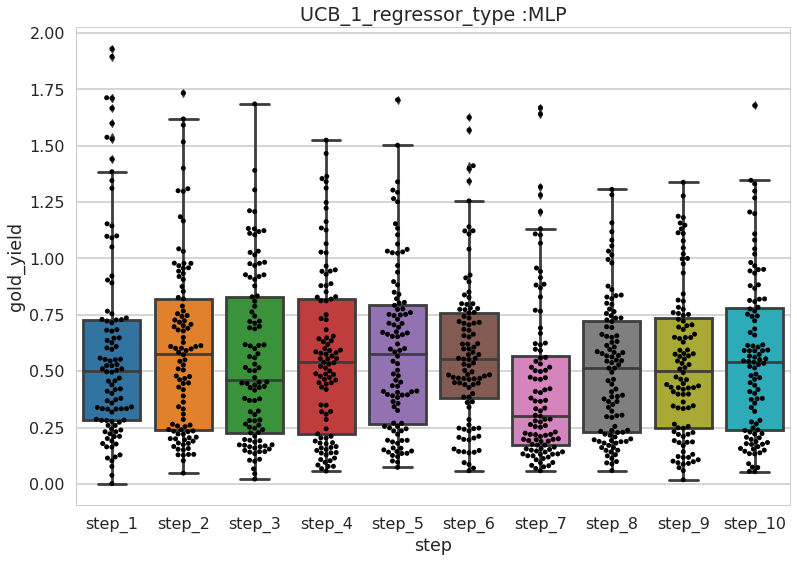

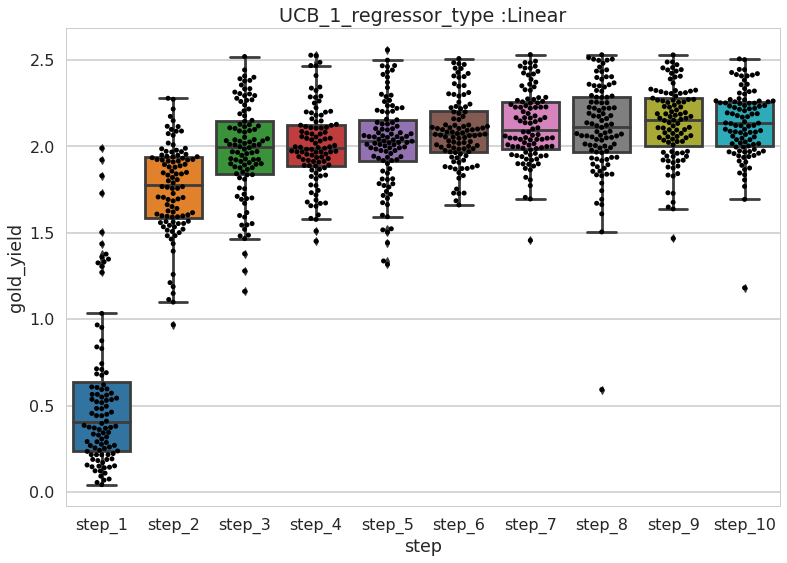

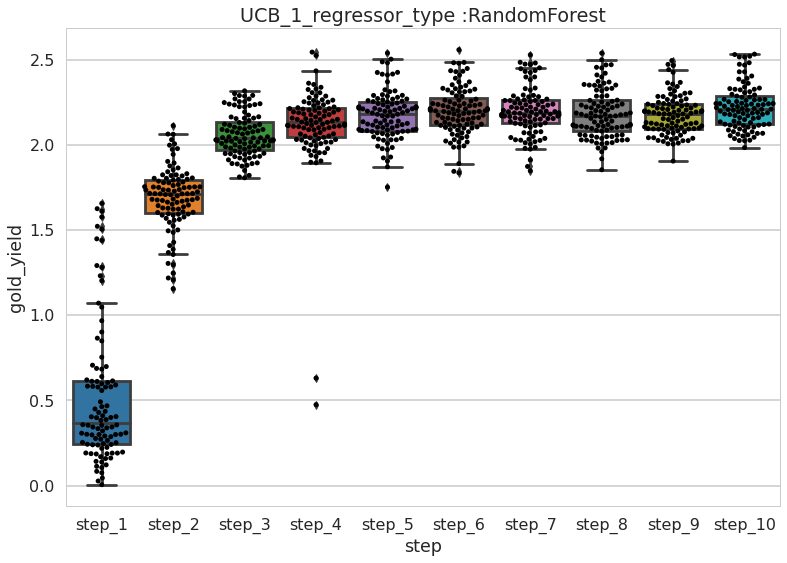

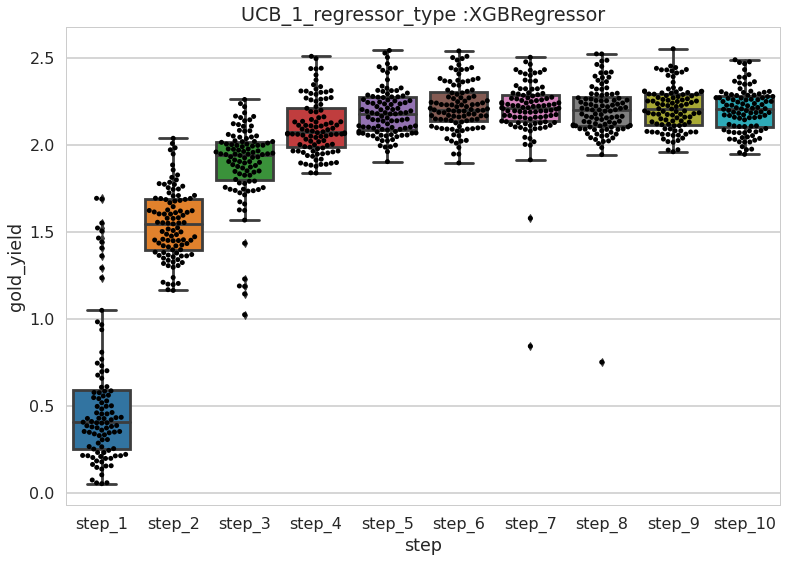

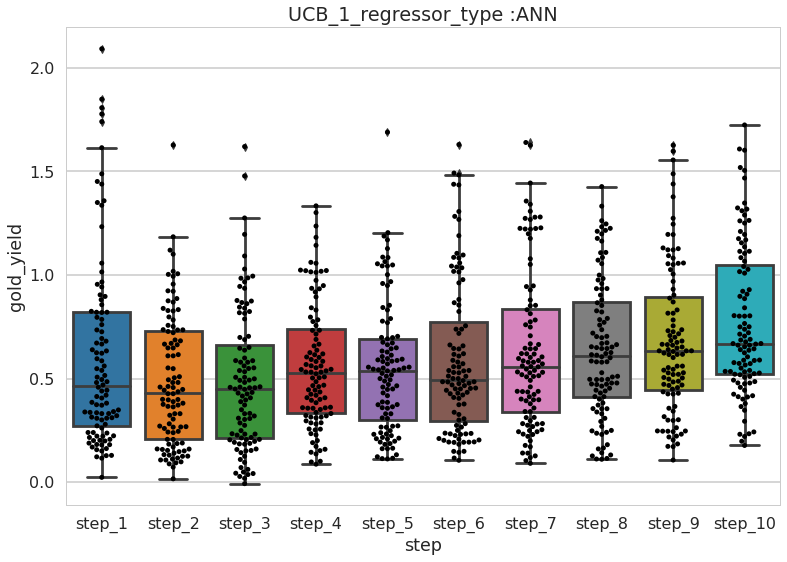

In [45]:
# Plotting
name = ['MLP', 'Linear', 'RandomForest', 'XGBRegressor', 'ANN']
for i in range(len(regressor_lists_list)):
    boxplot(result_UCB_list[i], 'step', 'gold_yield', title='UCB_1_regressor_type :{}'.format(name[i]),point_size=5)

In [ ]:
result_UCB_list_2 = []
for regressors in regressor_lists_list:
    # define our model that will be trained by active learning
    result, _ = bayesian_optimization(regressors, gold_regressor, allowed_conc,exploitation=1, exploration=1.41, test_size=100, steps=10, verbose=2)
    result_UCB_list_2.append(result)

step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  1


In [ ]:
# Plotting
name = ['MLP', 'Linear', 'RandomForest', 'XGBRegressor', 'ANN']
for i in range(len(regressor_list)):
    boxplot(result_UCB_list_2[i], 'step', 'gold_yield', title='UCB_2_regressor_type :{}'.format(name[i]),point_size=5)

In [ ]:
result_list = []
for regressor in regressor_list:
    # define our model that will be trained by active learning
    result, _ = active_learning(regressor, gold_regressor, allowed_conc, test_size=100, steps=10)
    result_list.append(result)

In [ ]:
# Plotting
name = ['MLP', 'Linear', 'RandomForest', 'XGBRegressor', 'ANN']
for i in range(len(regressor_list)):
    boxplot(result_list[i], 'step', 'gold_yield', title='regressor_type :{}'.format(name[i]),point_size=5)

In [14]:
import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# define our RidgePlot Function
def ridgeplot(data, row, col):
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(data, row=row, hue=row, aspect=15, height=.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, col, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, col, clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, col)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    return g

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


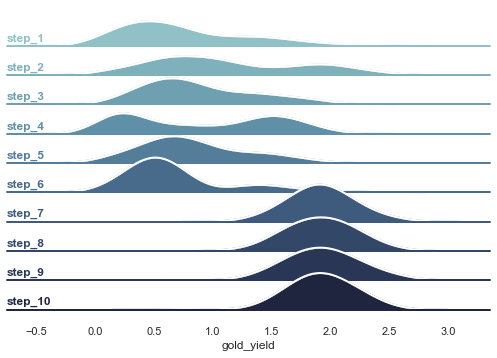

In [15]:
ridgeplot(result, 'step', 'gold_yield')